In [4]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
import desimodel.io
import desitarget.mtl
from desitarget.targetmask import desi_mask, obsconditions
from collections import Counter
%matplotlib inline

In [5]:
def get_ids(tgdata):
    tgprops = dict()
    ii = (tgdata['DEVICE_TYPE']=='POS') & (tgdata['TARGETID']>0)
    assigned_ids = tgdata[ii]
    return assigned_ids['TARGETID']

def count_numobs_done(data_path, mtl_file):
    # list the fiberassignment files available
    tile_files = glob.glob(os.path.join(data_path, "fiberassign_*"))
    print('number of available tile files', len(tile_files))
    
    # getting all the targetids of the assigned fibers
    print('reading the individual fiberassign files')
    prop_assign = dict()
    for i_tile, tile_file in enumerate(tile_files):
        if i_tile%200 ==0:
            print(i_tile)
        assignments = Table.read(tile_file, hdu=1)
        prop_assign[i_tile] = get_ids(assignments)
    
    # consolidate a single list of assigned targetids
    print('consolidating a single list of targets')
    assigned = list()
    for k in prop_assign.keys():
        assigned.extend(list(prop_assign[k]))
        
    # count how many times each target was assigned
    print('counting how many times each target was assigned')
    counts_assigned = Counter(assigned)
    ids_assigned = list(counts_assigned.keys())
    
    print('loading mtl file')
    # load the original mtl file used as an input to fiberassign
    input_mtl_data = Table.read(mtl_file)
    
    #adding a new column to the mtl file
    print('adding new column')
    input_mtl_data['NUMOBS_DONE'] = np.zeros(len(input_mtl_data), dtype=int)
    
    #finding what targets in the mtl file overlap with the assignment results
    print('finding ID overlap')
    overlap_ids = np.isin(input_mtl_data['TARGETID'], ids_assigned)
    
    #update the new column
    print('updating NUMOBS_DONE')
    for i, overlap in enumerate(overlap_ids):
        if overlap:
            input_mtl_data['NUMOBS_DONE'][i] = counts_assigned[input_mtl_data['TARGETID'][i]]
            
    outputfile = mtl_file.replace('mtl','fiberassigned_mtl')
    print('Writing the new results to {}'.format(outputfile))
    input_mtl_data.write(outputfile, overwrite=True)
    print('done')

In [6]:
count_numobs_done("dark_south_fiberassign/", "dr8_mtl_dark_gray_southern_cap.fits")

number of available tile files 3085
reading the individual fiberassign files
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
consolidating a single list of targets
counting how many times each target was assigned
loading mtl file
adding new column
finding ID overlap
updating NUMOBS_DONE
Writing the new results to dr8_fiberassigned_mtl_dark_gray_southern_cap.fits
done


In [7]:
count_numobs_done("dark_north_fiberassign/", "dr8_mtl_dark_gray_northern_cap.fits")

number of available tile files 6958
reading the individual fiberassign files
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
consolidating a single list of targets
counting how many times each target was assigned
loading mtl file
adding new column
finding ID overlap
updating NUMOBS_DONE
Writing the new results to dr8_fiberassigned_mtl_dark_gray_northern_cap.fits
done


In [8]:
count_numobs_done("bright_fiberassign/", "dr8_mtl_bright.fits")

number of available tile files 6028
reading the individual fiberassign files
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
consolidating a single list of targets
counting how many times each target was assigned
loading mtl file
adding new column
finding ID overlap
updating NUMOBS_DONE
Writing the new results to dr8_fiberassigned_mtl_bright.fits
done


In [11]:
data = Table.read("dr8_fiberassigned_mtl_bright.fits")

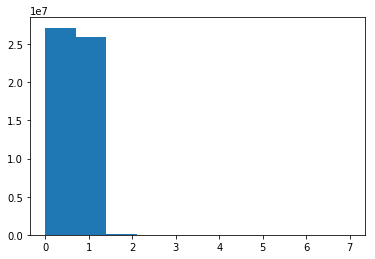

In [12]:
_ = plt.hist(data['NUMOBS_DONE'])

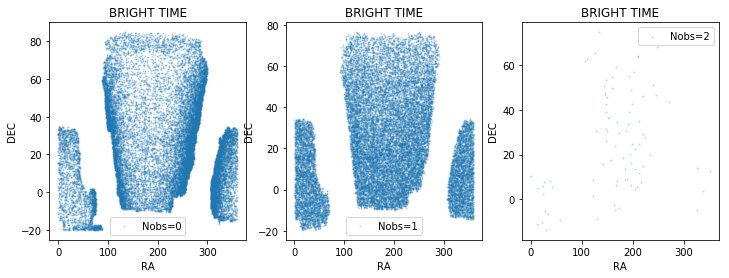

In [24]:
plt.figure(figsize=(12,4))
r = np.random.random(len(data))

plt.subplot(1,3,1)
ii = (data['NUMOBS_DONE']==0)&(r<0.001)
plt.scatter(data['RA'][ii], data['DEC'][ii], s=1, label='Nobs=0', alpha=0.2)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('BRIGHT TIME')
plt.legend()

plt.subplot(1,3,2)
ii = (data['NUMOBS_DONE']==1)&(r<0.001)
plt.scatter(data['RA'][ii], data['DEC'][ii], s=1, label='Nobs=1', alpha=0.2)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('BRIGHT TIME')
plt.legend()

plt.subplot(1,3,3)
ii = (data['NUMOBS_DONE']==2)&(r<0.001)
plt.scatter(data['RA'][ii], data['DEC'][ii], s=1, label='Nobs=2', alpha=0.2)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('BRIGHT TIME')
plt.legend()


In [25]:
data_dark = Table.read("dr8_fiberassigned_mtl_dark_gray_northern_cap.fits")

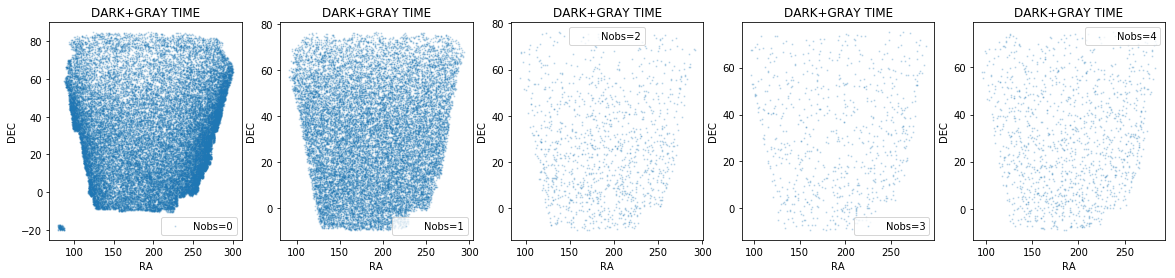

In [33]:
plt.figure(figsize=(20,4))
r = np.random.random(len(data_dark))

for i in range(5):
    plt.subplot(1,5,i+1)
    ii = (data_dark['NUMOBS_DONE']==i)&(r<0.001)
    plt.scatter(data_dark['RA'][ii], data_dark['DEC'][ii], s=1, label='Nobs={}'.format(i), alpha=0.2)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('DARK+GRAY TIME')
    plt.legend()
